In [1]:
# Particle.PID

# 22 - fotão
# 24 - W+
# 25 - Higgs
# 11 - eletrão
# 12 - neutrino e
# 13 - mu
# 14 - neutrino mu 
# 5 - quark b
# 15 - tau 
# 16 - neutrino tau


#Importing the modules

import uproot
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
import pandas as pd

# Reading the trees

file_SM = uproot.open("data/SM/Events/run_01/unweighted_events.root")
file_CP_IMPAR = uproot.open("data/CP_IMPAR/Events/run_01/unweighted_events.root")
file_CP_PAR = uproot.open("data/CP_PAR/Events/run_01/unweighted_events.root")

particle_tree_SM = file_SM["LHEF/Particle"]
particle_tree_CP_IMPAR = file_CP_IMPAR["LHEF/Particle"]
particle_tree_CP_PAR = file_CP_PAR["LHEF/Particle"]

# Converting to panda dataframes

SM = particle_tree_SM.arrays(particle_tree_SM.keys(), library="pd")
CP_IMPAR = particle_tree_CP_IMPAR.arrays(particle_tree_CP_IMPAR.keys(), library="pd")
CP_PAR = particle_tree_CP_PAR.arrays(particle_tree_CP_PAR.keys(), library="pd")

In [2]:
SM.head(11)

Particle.fUniqueID  Particle.fBits  Particle.PID  \
entry subentry                                                     
0     0                          0        50331648            22   
      1                          0        50331648            22   
      2                          0        50331648            24   
      3                          0        50331648            25   
      4                          0        50331648           -24   
      5                          0        50331648           -11   
      6                          0        50331648            12   
      7                          0        50331648            13   
      8                          0        50331648           -14   
      9                          0        50331648             5   
      10                         0        50331648            -5   

                Particle.Status  Particle.Mother1  Particle.Mother2  \
entry subentry                                                        
0     0                      -1                -1                -1   
      1                      -1                -1                -1   
      2                       2                 0                 1   
      3                       2                 0                 1   
      4                       2                 0                 1   
      5                       1                 2                 2   
      6                       1                 2                 2   
      7                       1                 4                 4   
      8                       1                 4                 4   
      9                       1                 3                 3   
      10                      1                 3                 3   

                Particle.ColorLine1  Particle.ColorLine2  Particle.Px  \
entry subentry                                                          
0     0                           0                    0     0.000000   
      1                           0                    0    -0.000000   
      2                           0                    0   -23.334528   
      3                           0                    0    88.535659   
      4                           0                    0   -65.201130   
      5                           0                    0   -48.630806   
      6                           0                    0    25.296278   
      7                           0                    0   -10.166138   
      8                           0                    0   -55.034993   
      9                         501                    0    56.600544   
      10                          0                  501    31.935114   

                Particle.Py  Particle.Pz  Particle.E  Particle.M  Particle.PT  \
entry subentry                                                                  
0     0            0.000000   394.634616  394.634616    0.000000     0.000000   
      1           -0.000000  -979.870224  979.870224    0.000000     0.000000   
      2          -25.739196  -925.422809  929.738601   82.458982    34.741998   
      3          -27.451249   121.820881  197.685466  125.088299    92.693764   
      4           53.190445   218.366320  247.080772   79.275768    84.145177   
      5          -29.537211  -780.850847  782.921099    0.000000    56.898173   
      6            3.798016  -144.571962  146.817502    0.000000    25.579808   
      7          -11.739170   100.509920  101.702520    0.000000    15.529277   
      8           64.929614   117.856400  145.378252    0.000000    85.115834   
      9            6.704118    -9.763547   57.977289    4.180000    56.996200   
      10         -34.155367   131.584428  139.708177    4.180000    46.759391   

                Particle.Eta  Particle.Phi  Particle.Rapidity  \
entry subentry                                                  
0     0           999.900000      0.000000         999.900000   
      1 

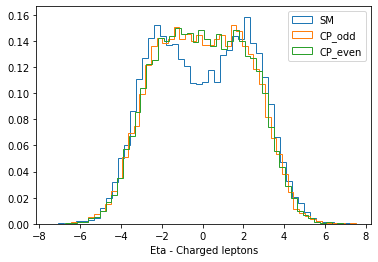

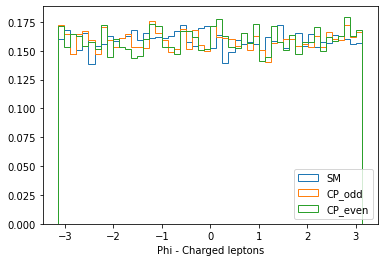

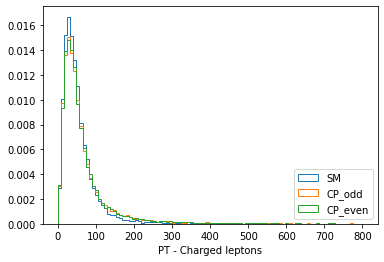

In [3]:
# Reducing the dataframe to leptons 

SM_leptons = SM[SM['Particle.PID'].isin([-11, 11, -13, 13, -15, 15])] 
CP_IMPAR_leptons = CP_IMPAR[CP_IMPAR['Particle.PID'].isin([-11, 11, -13, 13, -15, 15])] 
CP_PAR_leptons = CP_PAR[CP_PAR['Particle.PID'].isin([-11, 11, -13, 13, -15, 15])] 

#Eta for charged leptons 
plt.hist(SM_leptons["Particle.Eta"], bins=50, histtype='step', density=True, label = 'SM')
plt.hist(CP_IMPAR_leptons["Particle.Eta"], bins=50, histtype='step', density=True, label = 'CP_odd')
plt.hist(CP_PAR_leptons["Particle.Eta"], bins=50, histtype='step', density=True, label = 'CP_even')
plt.legend()
plt.xlabel('Eta - Charged leptons')
plt.savefig('eta_charged_leptons.png', transparent=False)
plt.show()

#Phi for charged leptons 
plt.hist(SM_leptons["Particle.Phi"], bins=50, histtype='step', density=True, label = 'SM')
plt.hist(CP_IMPAR_leptons["Particle.Phi"], bins=50, histtype='step', density=True, label = 'CP_odd')
plt.hist(CP_PAR_leptons["Particle.Phi"], bins=50, histtype='step', density=True, label = 'CP_even')
plt.xlabel('Phi - Charged leptons')
plt.legend(loc=4)
plt.savefig('phi_charged_leptons.png', transparent=False)
plt.show()

#PT for charged leptons 
bins1 = plt.hist(SM_leptons["Particle.PT"], bins=np.linspace(0,800,100), histtype='step', density=True, label = 'SM')
plt.hist(CP_IMPAR_leptons["Particle.PT"], bins=bins1[1], histtype='step', density=True, label = 'CP_odd')
plt.hist(CP_PAR_leptons["Particle.PT"], bins=bins1[1], histtype='step', density=True, label = 'CP_even')
plt.xlabel('PT - Charged leptons')
plt.savefig('pt_charged_leptons.png', transparent=False)
plt.legend(loc=4)
plt.show()


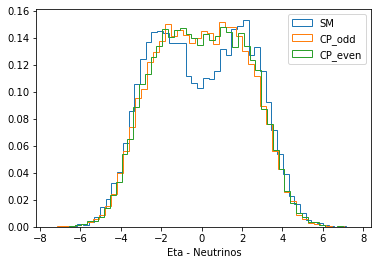

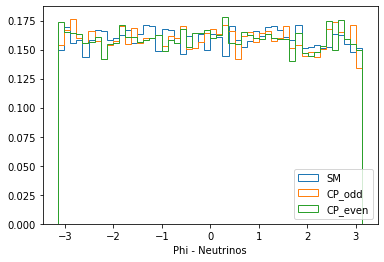

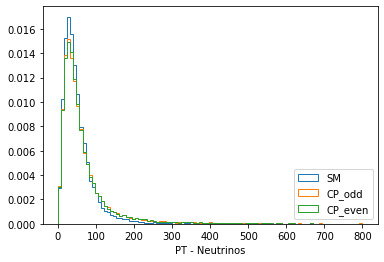

In [4]:
# Reducing the dataframe to neutrinos
SM_neutrinos = SM[SM['Particle.PID'].isin([-12, 12, -14, 14, -16, 16])]
CP_IMPAR_neutrinos = CP_IMPAR[CP_IMPAR['Particle.PID'].isin([-12, 12, -14, 14, -16, 16])]
CP_PAR_neutrinos = CP_PAR[CP_PAR['Particle.PID'].isin([-12, 12, -14, 14, -16, 16])]

# Eta for neutrinos
plt.hist(SM_neutrinos["Particle.Eta"], bins=50, histtype='step', density=True, label='SM')
plt.hist(CP_IMPAR_neutrinos["Particle.Eta"], bins=50, histtype='step', density=True, label='CP_odd')
plt.hist(CP_PAR_neutrinos["Particle.Eta"], bins=50, histtype='step', density=True, label='CP_even')
plt.legend()
plt.xlabel('Eta - Neutrinos')
plt.savefig('eta_neutrinos.png', transparent=False)
plt.show()

# Phi for neutrinos
plt.hist(SM_neutrinos["Particle.Phi"], bins=50, histtype='step', density=True, label='SM')
plt.hist(CP_IMPAR_neutrinos["Particle.Phi"], bins=50, histtype='step', density=True, label='CP_odd')
plt.hist(CP_PAR_neutrinos["Particle.Phi"], bins=50, histtype='step', density=True, label='CP_even')
plt.legend(loc=4)
plt.xlabel('Phi - Neutrinos')
plt.savefig('phi_neutrinos.png', transparent=False)
plt.show()

#PT for neutrinos
bins1 = plt.hist(SM_neutrinos["Particle.PT"], bins=np.linspace(0,800,100), histtype='step', density=True, label = 'SM')
plt.hist(CP_IMPAR_neutrinos["Particle.PT"], bins=bins1[1], histtype='step', density=True, label = 'CP_odd')
plt.hist(CP_PAR_neutrinos["Particle.PT"], bins=bins1[1], histtype='step', density=True, label = 'CP_even')
plt.xlabel('PT - Neutrinos')
plt.savefig('pt_neutrinos.png', transparent=False)
plt.legend(loc=4)
plt.show()


In [23]:
def pt_WWH(df):

    w_bosons = df[df['Particle.PID'].isin([24, -24])]
    higgs = df[df['Particle.PID'] == 25]
    
    px_WWH = (w_bosons.iloc[0]['Particle.Px'] + w_bosons.iloc[1]['Particle.Px'] + higgs.iloc[0]['Particle.Px'])
    py_WWH = (w_bosons.iloc[0]['Particle.Py'] + w_bosons.iloc[1]['Particle.Py'] + higgs.iloc[0]['Particle.Py'])
    
    pt_WWH = np.sqrt(px_WWH**2 + py_WWH**2)
    return pt_WWH

In [24]:
def new_variables(dataframe):

    pts_WWH = []

    for entry, new_df in dataframe.groupby(level=0):

        pts_WWH.append(pt_WWH(new_df))


    new_variables = pd.DataFrame({ 'pt_WWH': pts_WWH})
    
    return new_variables

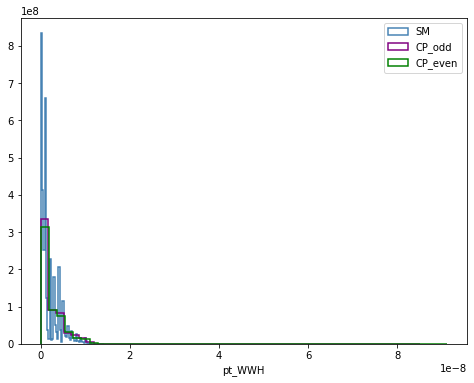

In [26]:
#Defining a new dataframe for each root file

new_SM = new_variables(SM)
new_CP_IMPAR = new_variables(CP_IMPAR)
new_CP_PAR = new_variables(CP_PAR)


def plot_histograms(dataframes, variable_name):
    plt.figure(figsize=(8, 6))
    colors = ['steelblue', 'purple', 'green']
    labels = ['SM', 'CP_odd', 'CP_even']

    for i, dataframe in enumerate(dataframes):
        plt.hist(dataframe[variable_name], bins=50, histtype='step', density=True, color=colors[i], lw=1.5, label=labels[i])

    plt.xlabel(variable_name)
    plt.legend()
    #plt.savefig(f'{variable_name}_histogram.png', transparent=False)
    


dataframes = [new_SM, new_CP_IMPAR, new_CP_PAR]


for variable in new_SM.columns:
    plot_histograms(dataframes, variable)

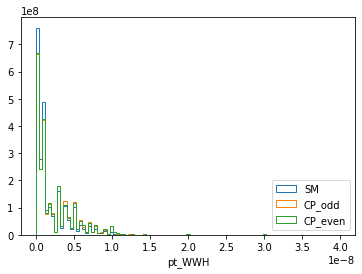

In [29]:
bins1 = plt.hist(new_SM["pt_WWH"], bins=np.linspace(0,4e-8,100), histtype='step', density=True, label = 'SM')
plt.hist(new_CP_IMPAR["pt_WWH"], bins=bins1[1], histtype='step', density=True, label = 'CP_odd')
plt.hist(new_CP_PAR["pt_WWH"], bins=bins1[1], histtype='step', density=True, label = 'CP_even')
plt.xlabel('pt_WWH')
plt.legend(loc=4)
plt.show()